# 비지도학습

## GMM(가우시안 혼합 모델)
- 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
- 각 샘플이 각 클러스터에서 생성될 확률을 구해서 가장 확률이 높은 클러스터에 할당(soft 클러스터 할당)
    - k-means의 경우 hard 클러스터 할당
- 원형/타원의 클러스터에 적합
    - k-means의 경우 원형에만 적합
    - 반달모양의 데이터인 경우 DBSCAN이 더 적합

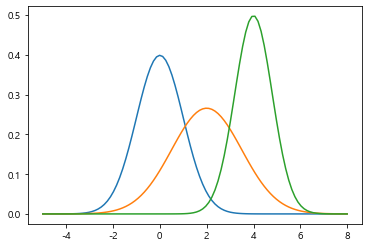

In [24]:
# 각 가우시안 분포가 혼합된 형태
import scipy.stats as stats
x = np.linspace(-5,8,100) # 모든 샘플
y1 = stats.norm(0, 1).pdf(x)
y2 = stats.norm(2,1.5).pdf(x)
y3 = stats.norm(4,0.8).pdf(x)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x, y3)

- $x_{i}$ : i번째 샘플
- $\pi_{j}$ : j번째 클러스터가 선택될 확률
- $z_{i}$ : i번째 샘플을 위해 선택한 클러스터
- $u_{j}$ : j번째 클러스터의 평균
- $\Sigma_{j}$ : j번째 클러스터의 분산

- 각 데이터($x^{(i)}$)의 확률  
    - $P(x_{i}) = \sum_{j=1}^{k}{\pi_{j}N(x_{i}|\mu_{j},\Sigma_{j}})$  
        - $\sum_{j=1}^{k}{\pi_{j}} = 1$
        - $0<=\pi_{j}<=1$
    - 각 모든 클러스터에서 i번째 데이터가 생성될 확률의 합
    - 각 클러스터가 전체망라, 상호배타이기 때문에 해당 식이 성립

=> GMM을 학습 : 적절한 $\pi_{j}, \mu_{j}, \Sigma_{j}$를 찾는 것

*GMM 모델의 train 과 classification은 보충개념에서 더 자세히 설명*

## 2. GMM을 이용한 classification

In [23]:
from matplotlib import font_manager, rc 
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100)

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 2, n_init = 10) # 초기화 값은 10개 사용(default : 1), cluster은 3개
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [11]:
"""
각 클러스터는 또 각 feature을 변수로 하는 다변량정규분포이기 때문에
- 평균의 개수 : 클러스터 개수*feature 개수
- 공분산 행렬의 크기 : 클러스터 개수Xfeature개수Xfeature개수(3차원)
"""
print(gm.weights_) # 각 분포가 선택될 확률
print(gm.means_) # 각 분포의 평균
print(gm.covariances_) # 각 분포의 공분산 행렬

[0.5 0.5]
[[ 1.14083896 -0.12900798]
 [-0.14083896  0.62900798]]
[[[0.34932642 0.05604626]
  [0.05604626 0.09701712]]

 [[0.34932642 0.05604626]
  [0.05604626 0.09701712]]]


In [16]:
# hard classification
print(gm.predict(X))
# soft classification
print(gm.predict_proba(X)[:10])

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1]
[[5.43072107e-06 9.99994569e-01]
 [4.21084446e-05 9.99957892e-01]
 [5.11948024e-06 9.99994881e-01]
 [1.17452621e-02 9.88254738e-01]
 [9.82103648e-01 1.78963515e-02]
 [1.89889305e-05 9.99981011e-01]
 [8.72886160e-06 9.99991271e-01]
 [9.99994881e-01 5.11948024e-06]
 [1.46419566e-03 9.98535804e-01]
 [6.67189022e-06 9.99993328e-01]]


In [22]:
# 각 데이터 샘플의 해당 클러스터에서의 위치에서의 확률밀도함수의 log값 반환
# 값이 클수록 해당 지역에서의 밀도가 높음
print(gm.score_samples(X)[:10])
# 실제 확률 밀도 함수 값
# 실제 확률이 아닌 pdf값이기 때문에 어떠한 양수도 가능
print(np.exp(gm.score_samples(X)[:10]))

[-1.51539856 -1.55632411 -1.49996916 -1.72674768 -1.25169437 -1.44665995
 -1.53158182 -1.49996916 -1.49294823 -1.42466991]
[0.2197206  0.21090993 0.22313704 0.17786193 0.28601976 0.23535507
 0.21619342 0.22313704 0.22470918 0.24058787]


## 3. GMM 학습
- EM 알고리즘을 사용
- E-step
    - M-step에서 생성된 파라미터를 이용하여 각 데이터가 해당 클러스터에서 생성되었을 확률을 계산
    - 제일 첫번째에서는 랜덤 초기화
- M-step
    - E-step에서 생성된 각 확률을 이용하여 파라미터 업데이트
- 해당 과정을 수렴할때 까지 혹은 지정된 횟수까지 반복

In [14]:
# 수렴여부 확인
print(gm.converged_)
# 반복횟수 확인
print(gm.n_iter_)

True
5


## 4. GMM을 이용한 데이터 생성
- GMM을 이용하여 새로운 샘플을 만들 수 있음
    - 각 클러스터에서 샘플이 생성되기 때문
    - 해당 모델을 기준으로 했을 때의 y값(배정되는 클러스터) 또한 나옴

In [17]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 1.24339963 -0.13922496]
 [ 0.89364324 -0.16458797]
 [ 1.12478046  0.48848436]
 [ 0.7457648   1.10284798]
 [-0.19158572  0.70781177]
 [-0.40239064  0.99567495]]
[0 0 0 1 1 1]


## 5. GMM 함수에 제약 추가

- 각 클러스터는 다변수정규분포

#### *공분산행렬에 따른 다변수정규분포의 pdf 형태*

1. 각 feature가 서로 독립
    1. 각 feature의 분산이 다르면 : 대각행렬, 각 타원의 축이 각 좌표 축과 평행한 타원
    2. 각 feature의 분산이 같으면 : Identity matrix, 원형
1. 각 feature가 독립이지 않으면
    1. 각 타원의 축이 각 좌표 축과 평행하지 않은 타원

- covariance_type을 지정해줌으로써 클러스터에 제약 추가
    - "spherical" : 모든 클러스터가 원형, 하지만 분산이 다를 수 있기 때문에 각 클러스터의 지름은 다를 수 있음(1-B에 해당)
        - 학습할 파라미터가 크게 줄어듦. 편차가 커질 가능성 있음
    - "diag" : 타원의 축이 좌표축과 나란한 타원(1-A에 해당)
        - 시간복잡도 : $O(kmn)$
    - "tied" : 모든 클러스터가 동일한 타원모양, 크기, 방향을 가짐.(모든 클러스터는 동일한 공분산 행렬을 가짐)
    - "full" : 각 클러스터는 모양, 크기, 방향에 제약이 없음
        - 시간복잡도 : $O(kmn^{2}+kn^{3})$

## 6. GMM을 사용한 이상치 탐지
- 밀도임계값을 정해서 밀도가 낮는 지역에 있는 샘플들을 이상치로 볼 수 있음
- 밀도임계값 정하는 방법
    - 일반적으로 회사는 결함율을 알고 있음
        - 만약 결함율이 4%라면, 전체 데이터에서 pdf가 낮은 4%를 결함율로 설정
- 밀도임계값 조정
    - 거짓음성(음성인데 음성으로 표시가 안되었다면)이 많다면 임계값을 높임
    - 거짓양성(양성인데 양성으로 표시가 안되었다면)이 많다면 임계값을 낮춤

In [25]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # 해당 값들에서 아래에서 4%에 해당하는 값을 구함
anomalies = X[densities < density_threshold]

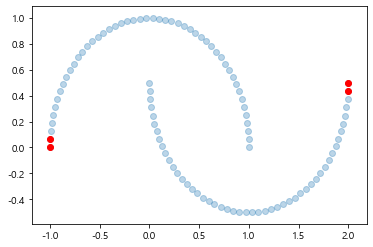

In [34]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(anomalies[:,0], anomalies[:,1], c="r")

- 반달 모양의 데이터인 경우 밀도추정에는 좋음

- GMM 모델은 모든 데이터(이상치를 포함하고 있을지도 모르는)에 맞추려고 하기 때문에, 이상치가 너무 많으면 정상치를 바라보는 시각이 편향되고 일부 이상치를 정상으로 정상으로 잘못 생각할 수 있음

-> 한 모델을 훈련하고 가장 크게 벗어난 이상치를 제거, 그 다음 정제된 데이터에서 다시 훈련  
-> 안정적인 공분산 추정 방법 사용(sklearn의 EllipticEnvelope 클래스)

In [27]:
anomalies

array([[ 2.00000000e+00,  5.00000000e-01],
       [-9.97945393e-01,  6.40702200e-02],
       [ 1.99794539e+00,  4.35929780e-01],
       [-1.00000000e+00,  1.22464680e-16]])

## 7. 클러스터 개수 선택
- GMM은 거리를 기준으로 하지 않기 때문에 이너셔/실루엣 점수를 사용할 수 없음
- 대신 BIC(Bayesian information criterion)/AIC(Akaike information criterion)을 최소화하는 모델을 찾음

#### BIC & AIC
- likelihood를 기반으로 하며, 모델의 파라미터 수에 대한 패널티를 부과함으로써 모델의 overfitting을 방지
- BIC
    - $P(D|M)$에서 출발
    - $log(m)p-2log(\hat{L})$
- AIC
    - $D_{KL}( f  ‖  g )$에서 출발
    - $2p-2log(\hat{L})$
- $m$ : 샘플의 개수
- $p$ : 파라미터 개수
- $\hat{L}$ : 모델의 likelihood function의 최댓값

- BIC가 모델에 대한 패널티를 더 부과-> 더 간단한 모델이 선택됨(편차가 높고 분산이 작음)
    - 특히 대규모셋일 때의 경우 이러한 경향이 더 심화

In [35]:
gm.bic(X)

391.33258762407104

In [36]:
gm.aic(X)

362.675715578202

In [42]:
bic = []
aic = []
for k in range(1,50):
    gm = GaussianMixture(n_components = k, n_init = 10)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

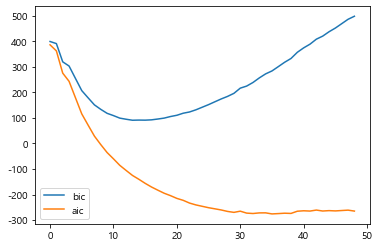

In [44]:
plt.plot(bic, label="bic")
plt.plot(aic, label="aic")
plt.legend()
plt.show()

- 반달 모양 데이터의 경우 클러스터 할당에는 좋지 않음

In [58]:
gm = GaussianMixture(n_components = 10, n_init = 10)
gm.fit(X)
predicted = gm.predict(X)

In [62]:
np.round(gm.weights_, 2)

array([0.1 , 0.11, 0.1 , 0.1 , 0.09, 0.11, 0.11, 0.11, 0.09, 0.08])

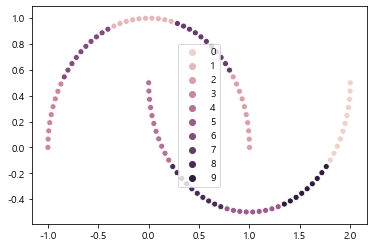

In [53]:
# bic가 가장 낮은 k=10으로 군집화
sns.scatterplot(X[:,0], X[:,1], hue=predicted, legend="full")

## 8. 베이즈 가우시안 혼합 모델
- concentration, 위샤트 분포를 사용하여 $\pi, \Sigma, \mu$에 대한 prior을 반영하여 모델링
- 초기에 해당 하이퍼 파라미터를 설정할 수 있음
- weight_concentration_prior
    - 0~1 사이의 값으로, $\pi$의 prior
    - 1에 가까우면 몇 개의 클러스터만 만들어짐
    - 0에 가까우면 많은 클러스터가 만들어짐
- 데이터셋이 크면 클수록 초기 prior의 영향이 줄어듦
    - 데이터셋에 의해 prior이 업데이트 되기 때문

In [63]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10) # default : 1
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.3 , 0.3 , 0.21, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])